In [1]:
import cooler
import HMMC
import pandas as pd
import bioframe as bf
from bioframe.util import bedtools
import HMMC

import matplotlib.pyplot as plt
import matplotlib as mp
import numpy as np

In [2]:
cooler_file = '/pollard/data/chromatin_organization/rao2014/distiller-0.3.1_hg19/results/mcools/GM12878_inSitu_MboI.hg19.mapq_30.1000.mcool'
resolution = 25000
hic_cooler = cooler.Cooler(cooler_file+'::resolutions/'+str(resolution))

In [3]:
hmm_track = pd.read_csv('../annotations/GM12878_hg19_25000.tsv', sep='\t')
hmm_track.head()

,chrom,start,end,weight,GC,E1,E2,E3,binary,HMM2,HMM3,HMM3P
0,chr1,0,25000,NaN,0.573067,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chr1,25000,50000,NaN,0.430960,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chr1,50000,75000,NaN,0.351400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,chr1,75000,100000,NaN,0.402080,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,chr1,100000,125000,NaN,0.371200,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
HMMC.track_to_bed(hmm_track, 'HMM3P').head()

,chrom,start,end,name,score,strand,thickStart,thickEnd,rgb
0,chr1,0,25000,N,0,-,0,25000,"248,248,248"
1,chr1,25000,50000,N,0,-,25000,50000,"248,248,248"
2,chr1,50000,75000,N,0,-,50000,75000,"248,248,248"
3,chr1,75000,100000,N,0,-,75000,100000,"248,248,248"
4,chr1,100000,125000,N,0,-,100000,125000,"248,248,248"


## Load Bedfiles

In [23]:
hmmp_bed = '../annotations/GM12878_hg19_25000.bed'
calder_bed = '../annotations/calder/GM12878_1in100_binsize=40kb.bed'
sniper_bed = '../annotations/sniper/GM12878_track_hg19.bed.gz'

In [24]:
hmmp_df = bf.read_table(hmmp_bed, schema='bed9')
hmmp_df.head()

,chrom,start,end,name,score,strand,thickStart,thickEnd,rgb
0,chr1,0,25000,N,0,-,0,25000,"248,248,248"
1,chr1,25000,50000,N,0,-,25000,50000,"248,248,248"
2,chr1,50000,75000,N,0,-,50000,75000,"248,248,248"
3,chr1,75000,100000,N,0,-,75000,100000,"248,248,248"
4,chr1,100000,125000,N,0,-,100000,125000,"248,248,248"


In [25]:
binsize = 10000
chromsizes = bf.fetch_chromsizes('hg38')
chrombins = bf.binnify(chromsizes[:22], binsize=binsize)
chrombins.head()

,chrom,start,end
0,chr1,0,10000
1,chr1,10000,20000
2,chr1,20000,30000
3,chr1,30000,40000
4,chr1,40000,50000


In [26]:
calder_df = bf.read_table(calder_bed, schema='bed12',skiprows=1)
calder_df.name = calder_df.name.apply(lambda x: x[:5])
calder_df.head()

,chrom,start,end,name,score,strand,thickStart,thickEnd,rgb,blockCount,blockSizes,blockStarts
0,chr1,80001,120000,A.2.2,0.602723,.,80001,120000,#FFDADA,1,0.625,NaN
1,chr1,520001,680000,A.2.2,0.602723,.,520001,680000,#FFDADA,1,0.625,NaN
2,chr1,680001,1240000,A.1.1,0.910891,.,680001,1240000,#FF0000,1,1.000,NaN
3,chr1,1240001,1440000,A.1.1,0.918317,.,1240001,1440000,#FF0000,1,1.000,NaN
4,chr1,1440001,1680000,A.1.1,0.931931,.,1440001,1680000,#FF0000,1,1.000,NaN


In [27]:
column_names = ['chrom', 'start', 'end', 'name', 'rgb']

In [28]:
calder_binned_df = bedtools.intersect(a=chrombins, b=calder_df.loc[:, column_names], wao=True).iloc[:, [0, 1, 2, 6, 7]]
calder_binned_df.columns = column_names
mask = calder_binned_df.name == '.'
calder_binned_df.loc[mask,'name'] = 'N'
calder_binned_df.loc[mask, 'rgb'] = '#F8F8F8'
calder_binned_df.head()

,chrom,start,end,name,rgb
0,chr1,0,10000,N,#F8F8F8
1,chr1,10000,20000,N,#F8F8F8
2,chr1,20000,30000,N,#F8F8F8
3,chr1,30000,40000,N,#F8F8F8
4,chr1,40000,50000,N,#F8F8F8


In [29]:
sniper_df = bf.read_table(sniper_bed, schema='bed9',skiprows=1)
sniper_df.head()

,chrom,start,end,name,score,strand,thickStart,thickEnd,rgb
0,chr1,0,100000,B1,0,.,0,100000,"220,20,60"
1,chr1,100000,200000,B1,0,.,100000,200000,"220,20,60"
2,chr1,200000,300000,B1,0,.,200000,300000,"220,20,60"
3,chr1,300000,400000,B1,0,.,300000,400000,"220,20,60"
4,chr1,400000,500000,B1,0,.,400000,500000,"220,20,60"


In [30]:
region = 'chr19:32,500,000-42,500,000'

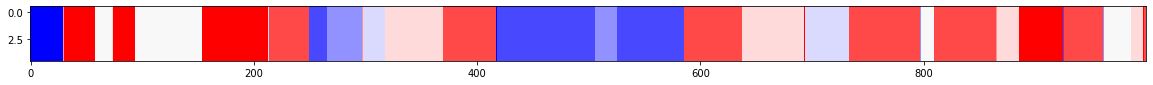

In [31]:
mat = HMMC.bed_to_mat(calder_binned_df, region , heatmap_width = 5, horizontal=True)
cmap = HMMC.cmap_from_bed(calder_binned_df, rgb=False)

plt.figure(figsize=(20, 1))
plt.imshow(mat, cmap=mp.colors.ListedColormap(cmap), aspect='auto')

/pollard/home/lchumpitaz/Hi-C/testing/HMMC/plotting_tools.py:184: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.yaxis.set_ticklabels(yticklabels)
/pollard/home/lchumpitaz/Hi-C/testing/HMMC/plotting_tools.py:189: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.xaxis.set_ticklabels(xticklabels)


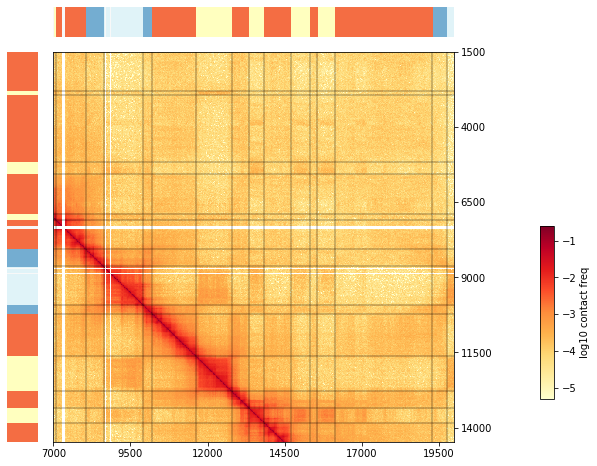

In [32]:
%matplotlib inline
region2 = 'chr19:1,500,000-14,500,000'
region1 = 'chr19:7,000,000-20,000,000'
fig = HMMC.plotmap(hic_cooler, hmmp_df, region1, region2, rgb=True, figure_width=8)

/pollard/home/lchumpitaz/Hi-C/testing/HMMC/plotting_tools.py:184: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.yaxis.set_ticklabels(yticklabels)
/pollard/home/lchumpitaz/Hi-C/testing/HMMC/plotting_tools.py:189: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.xaxis.set_ticklabels(xticklabels)


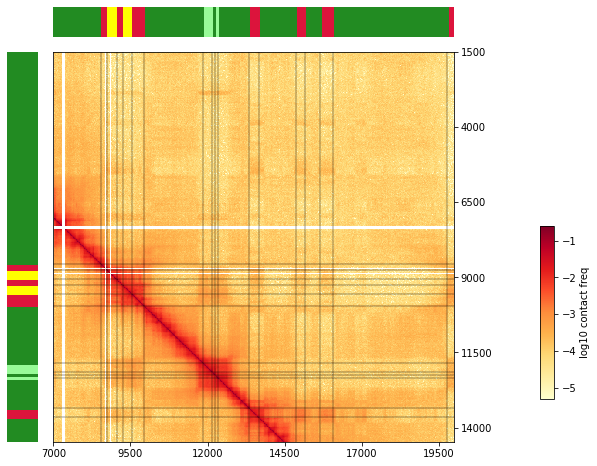

In [33]:
%matplotlib inline
region2 = 'chr19:1,500,000-14,500,000'
region1 = 'chr19:7,000,000-20,000,000'
fig = HMMC.plotmap(hic_cooler, sniper_df, region1, region2, rgb=True, figure_width=8)

/pollard/home/lchumpitaz/Hi-C/testing/HMMC/plotting_tools.py:184: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.yaxis.set_ticklabels(yticklabels)
/pollard/home/lchumpitaz/Hi-C/testing/HMMC/plotting_tools.py:189: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.xaxis.set_ticklabels(xticklabels)


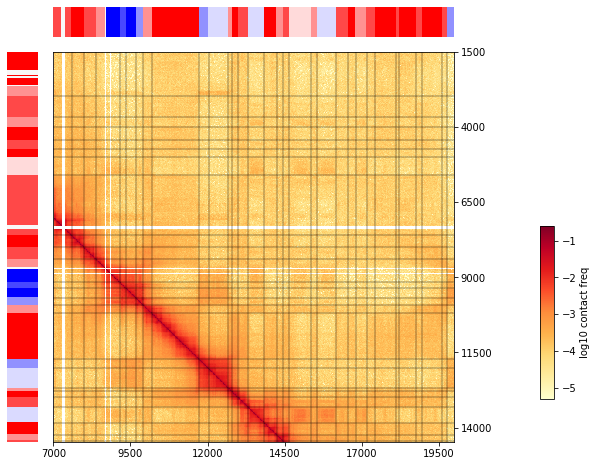

In [34]:
%matplotlib inline
region2 = 'chr19:1,500,000-14,500,000'
region1 = 'chr19:7,000,000-20,000,000'
fig = HMMC.plotmap(hic_cooler, calder_binned_df, region1, region2, rgb=False, figure_width=8)

/pollard/home/lchumpitaz/Hi-C/testing/HMMC/plotting_tools.py:184: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.yaxis.set_ticklabels(yticklabels)
/pollard/home/lchumpitaz/Hi-C/testing/HMMC/plotting_tools.py:189: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.xaxis.set_ticklabels(xticklabels)


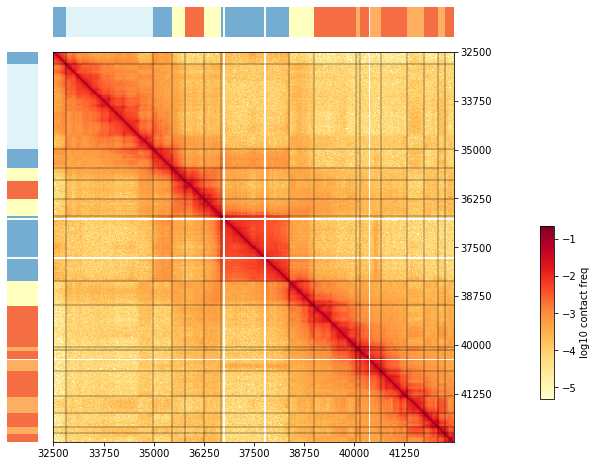

In [35]:
%matplotlib inline
region1 = 'chr19:32,500,000-42,500,000'
region2 = region1
fig = HMMC.plotmap(hic_cooler, hmmp_df, region1, region2, rgb=True, figure_width=8)

/pollard/home/lchumpitaz/Hi-C/testing/HMMC/plotting_tools.py:184: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.yaxis.set_ticklabels(yticklabels)
/pollard/home/lchumpitaz/Hi-C/testing/HMMC/plotting_tools.py:189: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.xaxis.set_ticklabels(xticklabels)


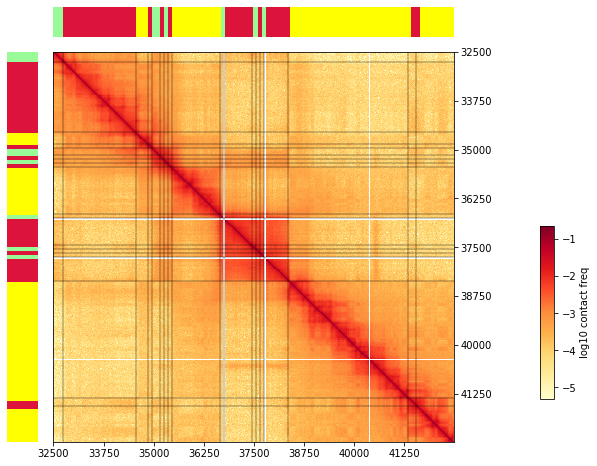

In [36]:
%matplotlib inline
region1 = 'chr19:32,500,000-42,500,000'
region2 = region1
fig = HMMC.plotmap(hic_cooler, sniper_df, region1, region2, rgb=True, figure_width=8)

/pollard/home/lchumpitaz/Hi-C/testing/HMMC/plotting_tools.py:184: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.yaxis.set_ticklabels(yticklabels)
/pollard/home/lchumpitaz/Hi-C/testing/HMMC/plotting_tools.py:189: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.xaxis.set_ticklabels(xticklabels)


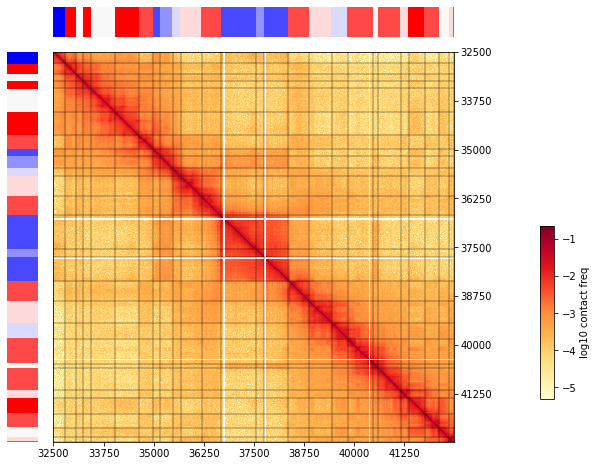

In [37]:
%matplotlib inline
region1 = 'chr19:32,500,000-42,500,000'
region2 = region1
fig = HMMC.plotmap(hic_cooler, calder_binned_df, region1, region2, rgb=False, figure_width=8)